# **BANKING CUSTOMER CHURN PREDICTION MODEL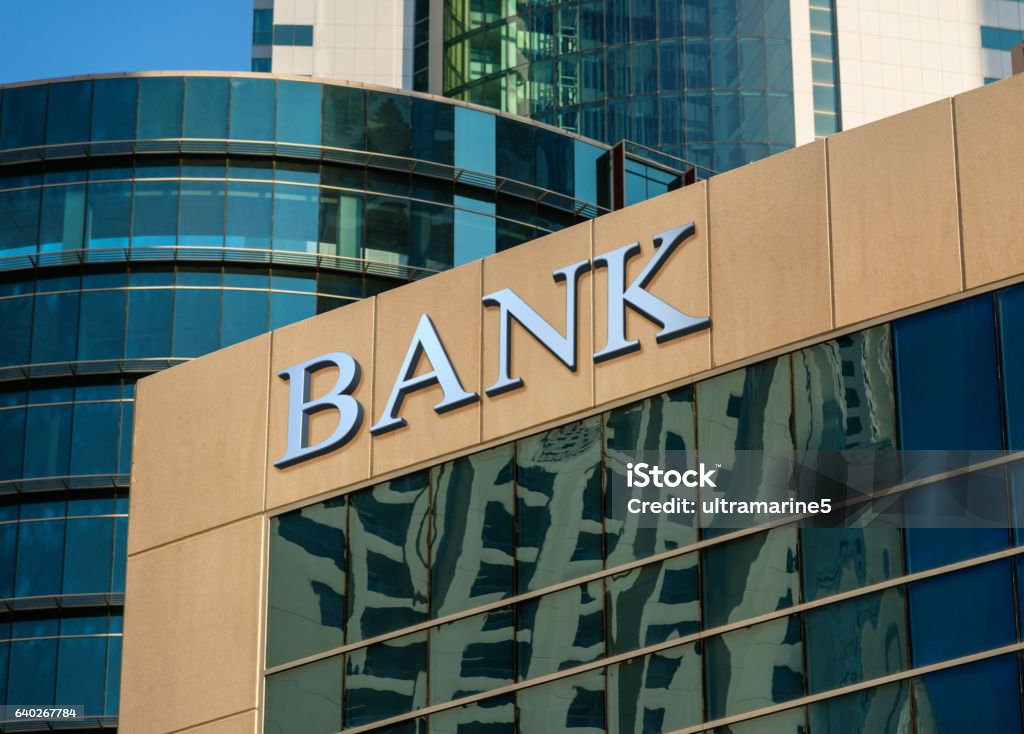**

**Final Project Submission**

Please fill out:
* Student name: Nicole Bosibori Nyagaka
* Student pace: Part time
* Scheduled project review date/time:
* Instructor name: William Okomba and Noah Kandie
* Blog post URL:


# **TABLE OF CONTENT**


1.  Introduction
2.  Business Understanding
1.  Data Understanding

1.  Problem Statement
2.  Objectives

1.  Data Preparation and Cleaning
1.  Exploratory Data Analysis
2.  Data Pre-Processing
1.  Modelling

1.   Evaluation

1.   Conclusion

1.   Reccomendations
2.   Next Steps















# **INTRODUCTION**
This dataset contains information about bank customers and their churn status, indicating whether they have exited the bank. It is useful for analyzing factors influencing customer churn and for building predictive models to identify customers at risk of leaving, helping banks enhance customer retention strategies.

# **BUSINESS UNDERSTANDING**
Customer churn is a critical concern for banks, as retaining existing customers is often more cost-effective than acquiring new ones. By analyzing the factors that lead to customer churn, banks can develop targeted strategies to improve customer satisfaction and loyalty. Understanding and predicting churn allows banks to implement proactive measures, such as personalized offers and improved customer service, to reduce churn rates and enhance overall profitability. This analysis not only aids in identifying at-risk customers but also in optimizing marketing efforts and resource allocation to maximize customer retention.

# **DATA UNDERSTANDING**
This dataset offers a detailed view of bank customers and their churn status, indicating whether they have left the bank. It includes demographic, financial, and behavioral attributes of the customers. Analyzing this data helps in identifying factors influencing customer churn, which is essential for building predictive models to identify at-risk customers and improve retention strategies.

**Target Variable:**

Exited: Indicates whether the customer has exited the bank (binary: yes/no).

**Unique Identifier:**

CustomerId: A unique identifier for each customer.

**Features:**

RowNumber: The sequential number assigned to each row in the dataset.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The geographical location of the customer (e.g., country or region).

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer has.

HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

EstimatedSalary: The estimated salary of the customer.


# **PROBLEM STATEMENT**
The primary goal is to identify the key factors that influence customer churn in a banking institution and develop a predictive model to accurately identify customers at risk of leaving. By leveraging the dataset's demographic, financial, and behavioral attributes, we aim to provide actionable insights and strategies for improving customer retention and minimizing churn rates.

# **OBJECTIVES**
**Main Objective**

Develop and Optimize Classification Models:

Build, train, and fine-tune classification models to accurately predict customer churn, evaluating their performance using appropriate metrics.

**Specific Objectives**

- Conduct Exploratory Data Analysis (EDA):


Analyze the dataset to understand the distribution and relationships of various features and identify patterns associated with customer churn.


- Generate Insights and Recommendations:

Interpret the results of the analysis and models to provide actionable insights and recommendations for improving customer retention.

# **DATA PREPARATION DATA CLEANING**

Data cleaning and preparation involves the process of identifying and resolving issues related to the quality of the dataset. Its primary objective is to ensure that the data is accurate, consistent, and devoid of errors.

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading and preview of the dataset
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**The columns have three data types:**

Integers: RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited

Float: Balance, EstimatedSalary

Object: Surname, Geography, Gender.

The data contains 10,000 rows and 14 columns

In [ ]:
# Create a new dataframe of the raw data to clean
df1 = pd.read_csv("Churn_Modelling.csv")

**Dropping Columns**

In [ ]:
# Dropping columns
df1 = df1.drop(['RowNumber','Surname'], axis=1)
df1

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Explanation**

RowNumber only gives the sequential number assigned to each row in the dataset.

No need for surname since we have CustomerID for Identification

**Missing Values**

In [ ]:
# calculate the missing columns
df1.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Duplicates**

In [ ]:
# Checking for duplicates using the 'CustomerId' column
df1[df1.duplicated(subset=["CustomerId"])]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Placeholders**

In [ ]:
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df1.columns:
    unique_values = df1[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df1[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


# **EXPLORATORY DATA ANALYSIS**
  Univariate Analysis

  Bivariate Analysis

   MultiVariate Analysis




# **Univariate Analysis**

**1.Credit Score**

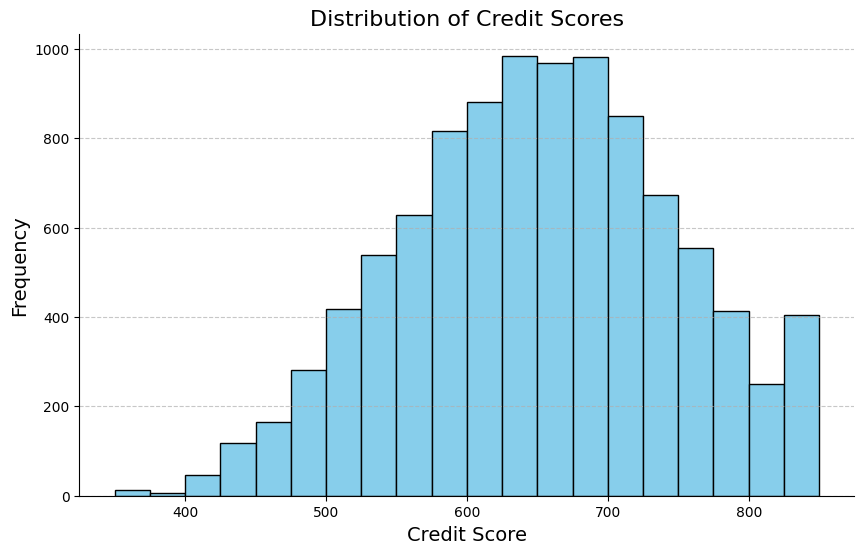

In [ ]:
plt.figure(figsize=(10, 6))
df1['CreditScore'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Scores', fontsize=16)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

**Conclusion**

The majority credit score is between 600 and 700 and the least is between 0 and 400

**2.Geography**

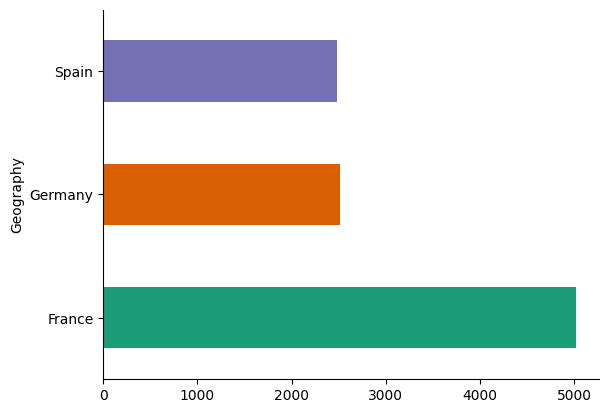

In [ ]:
df1.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Conclusion**

Majority of the customers are in France followed by Germany then Spain

**3.Gender**

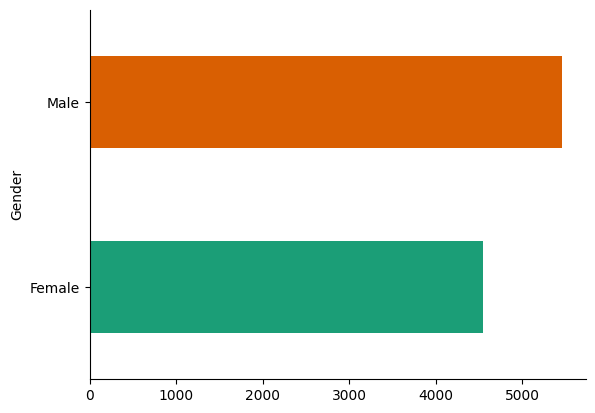

In [ ]:
df1.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Conclusion**

Majority of the customers are male while minority is female

**4.Age**

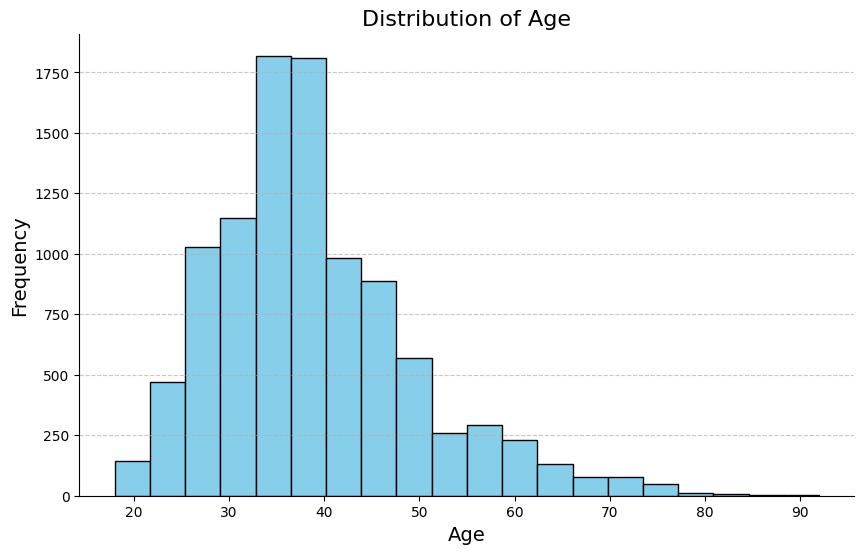

In [ ]:
plt.figure(figsize=(10, 6))
df1['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


**Conclusion**

Majority of the customers are between the age of 30 and 40

**5.Tenure**

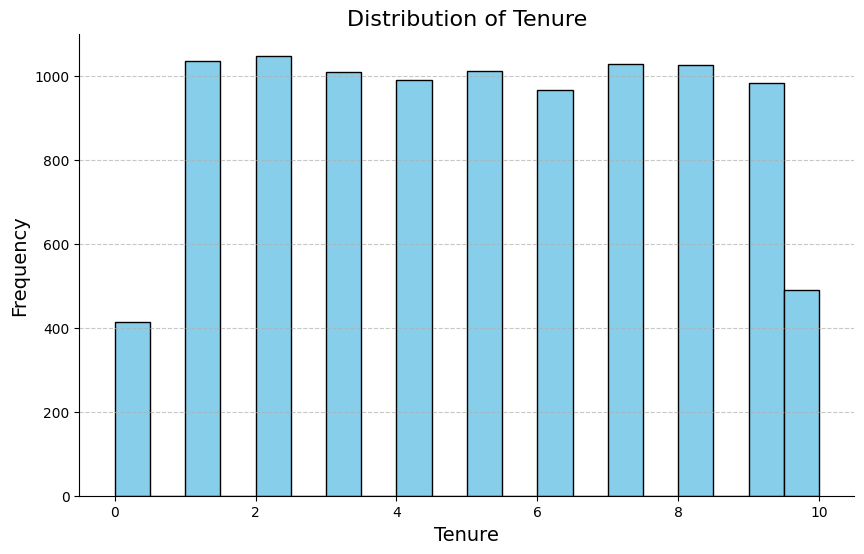

In [ ]:
plt.figure(figsize=(10, 6))
df1['Tenure'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure', fontsize=16)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


**Conclusion**

Majority of the customers have been with the bank number for 2 years.

**6.Balance**

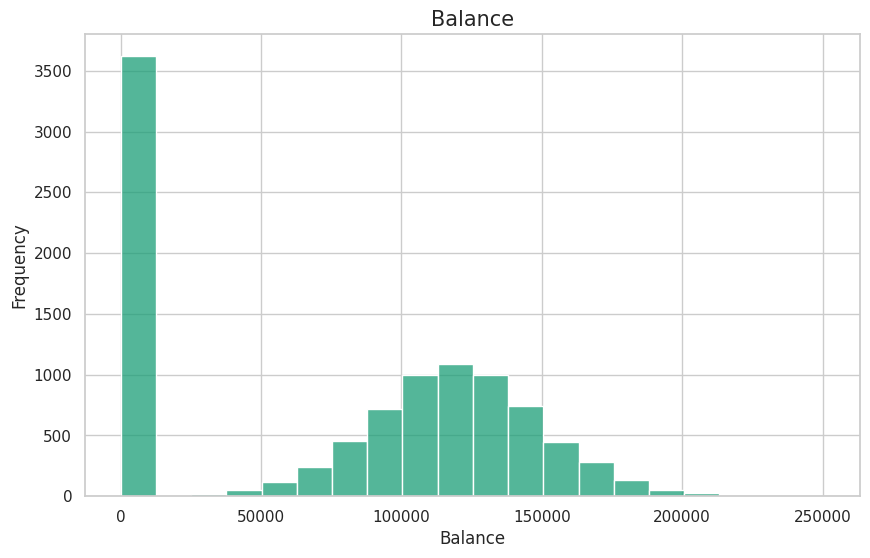

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram for Balance
plt.figure(figsize=(10, 6))
sns.histplot(df1['Balance'], bins=20, kde=False, color=sns.color_palette('Dark2')[0])

# Add title and labels
plt.title('Balance', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


**Conclusion**

Majority of the clients have 0 balance

**7.Number of Products**

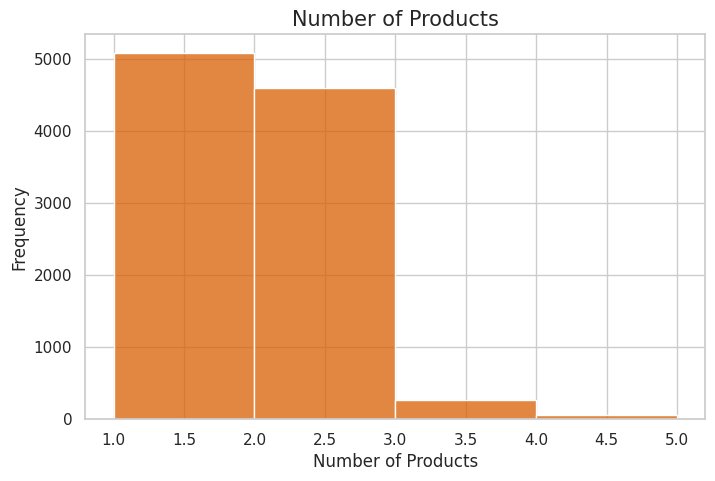

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram for NumOfProducts
plt.figure(figsize=(8, 5))  # figure size
sns.histplot(df1['NumOfProducts'], bins=range(1, df1['NumOfProducts'].max() + 2), kde=False, color=sns.color_palette('Dark2')[1])

# Add title and labels
plt.title('Number of Products', fontsize=15)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


**Conclusion**

Majority of the customers have 1 to 2 bank products

**8.Has Credit Cards**

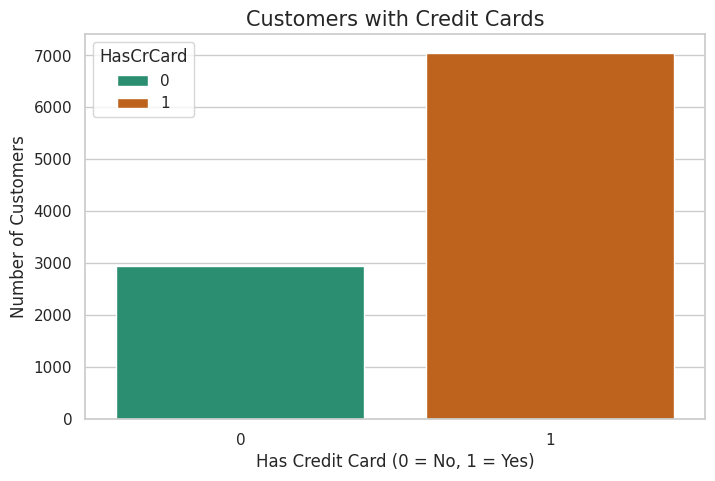

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the count data for HasCrCard
has_cr_card_counts = df1['HasCrCard'].value_counts().reset_index()
has_cr_card_counts.columns = ['HasCrCard', 'Count']

# Plot the bar chart for HasCrCard
plt.figure(figsize=(8, 5))
sns.barplot(data=has_cr_card_counts, x='HasCrCard', y='Count', hue='HasCrCard',palette='Dark2')

# Add title and labels
plt.title('Customers with Credit Cards', fontsize=15)
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()

**Conclusion**

Majority of the customers have credit cards

**9.Active Members**

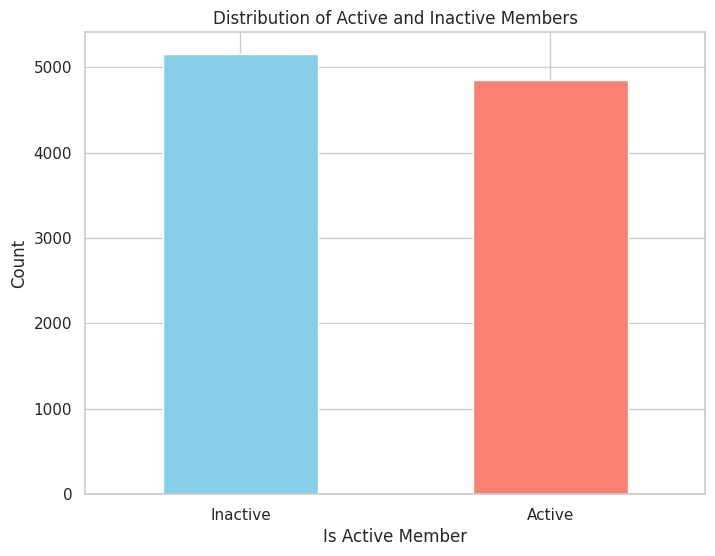

In [ ]:
# Count the number of active and inactive members
active_counts = df1['IsActiveMember'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
active_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Active and Inactive Members')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'], rotation=0)
plt.show()


**Conclusion**

Majority of the customers are inactive

**10.Estimated Salary**

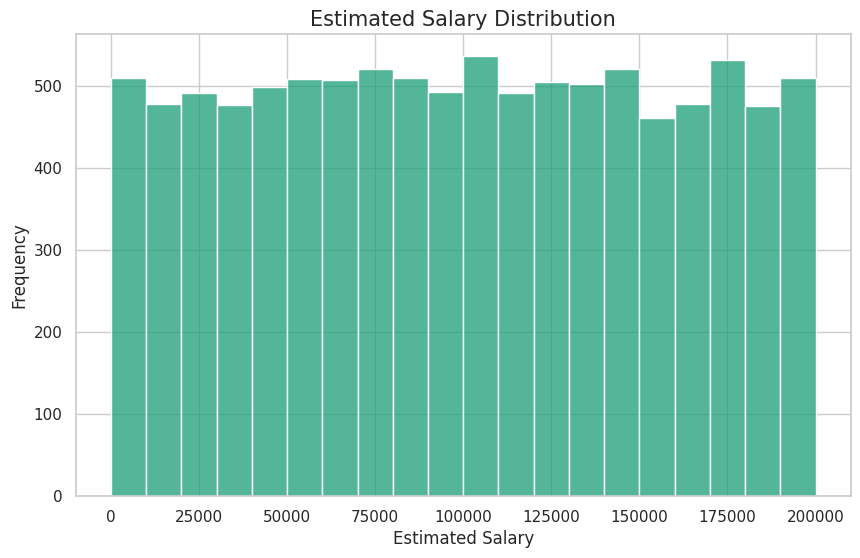

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram for EstimatedSalary
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], bins=20, kde=False, color=sns.color_palette('Dark2')[0])

# Add title and labels
plt.title('Estimated Salary Distribution', fontsize=15)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

**Conclusion**

Majority Estimated Salary is 100,000

**11.Exited**

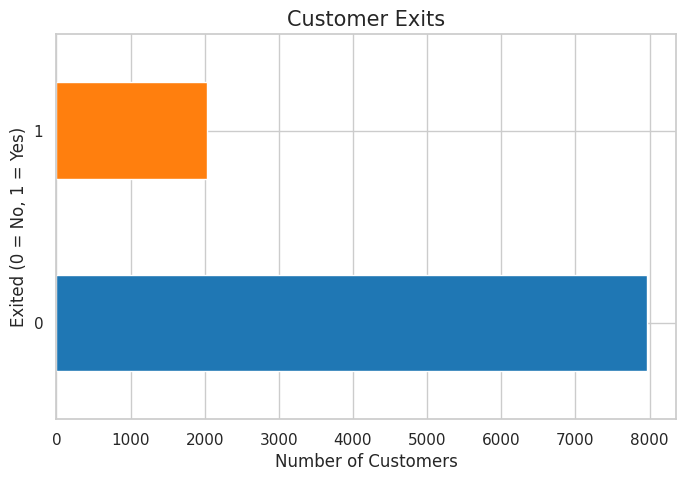

In [ ]:
# Create the count data for Exited
exited_counts = df1['Exited'].value_counts()

# Plot the bar chart for Exited
plt.figure(figsize=(8, 5))
exited_counts.plot(kind='barh', color=['#1f77b4', '#ff7f0e'])

# Add title and labels
plt.title('Customer Exits', fontsize=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Exited (0 = No, 1 = Yes)', fontsize=12)

# Display the plot
plt.show()


**Conclusion**

Only a few customers exited the bank

# **Bivariate Analysis**

**1.Credit Score Vs Exited**

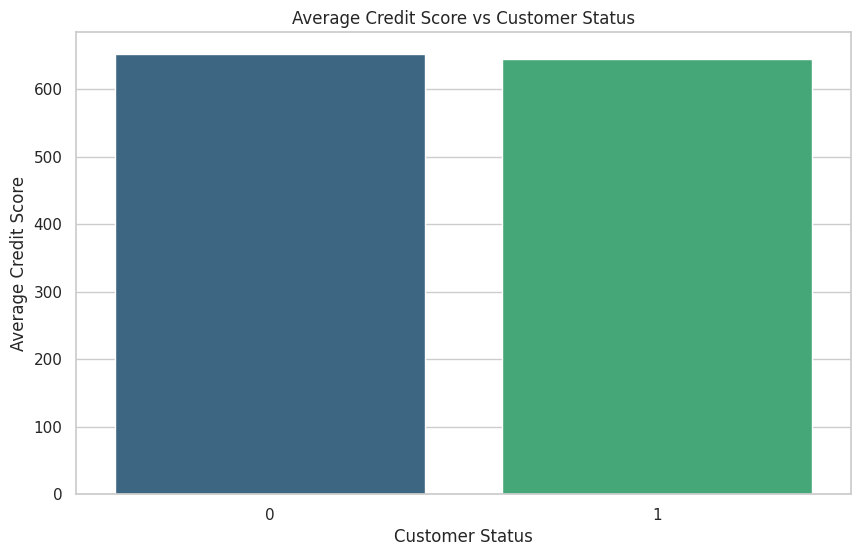

In [ ]:
# Calculate the average credit score for customers who have exited and those who have not
avg_credit_score_exited = df1.groupby('Exited')['CreditScore'].mean().reset_index()

# Plot the average credit score vs exited status
plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='CreditScore', data=avg_credit_score_exited, palette='viridis')
plt.xlabel('Customer Status')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score vs Customer Status')
plt.xticks(rotation=0)
plt.show()

**Conclusion**

No significant relationship

**2.Geography Vs Exited**

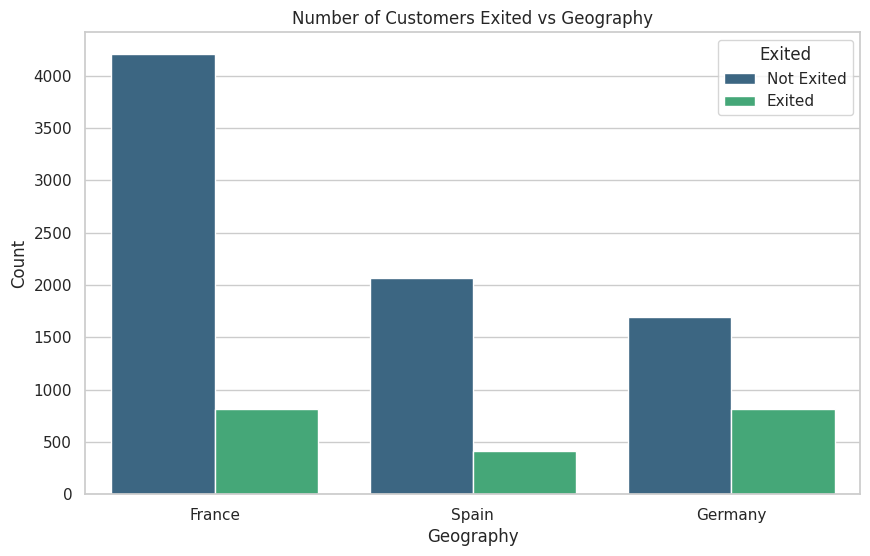

In [ ]:
# Plot the count of customers who exited vs. geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df1, palette='viridis')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Geography')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()

**Conclusion**

France has the most customers

In all countries minority of the customers exited where spain had the list customer churns

**3.Gender Vs Exited**

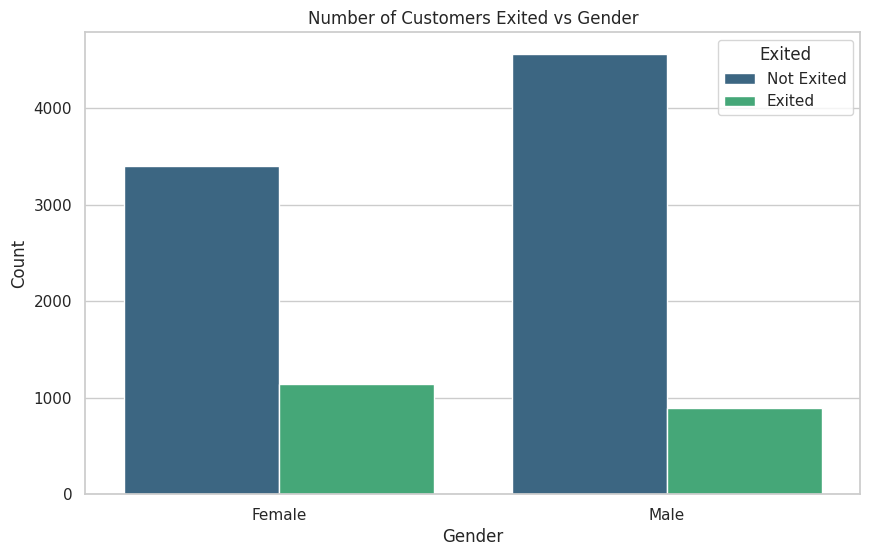

In [ ]:
# Plot the count of customers who exited vs. gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=df1, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Gender')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()

**Conclusion**

There are more male than female customers

More female customers exited than the male ones

**4.Age Vs Exited**

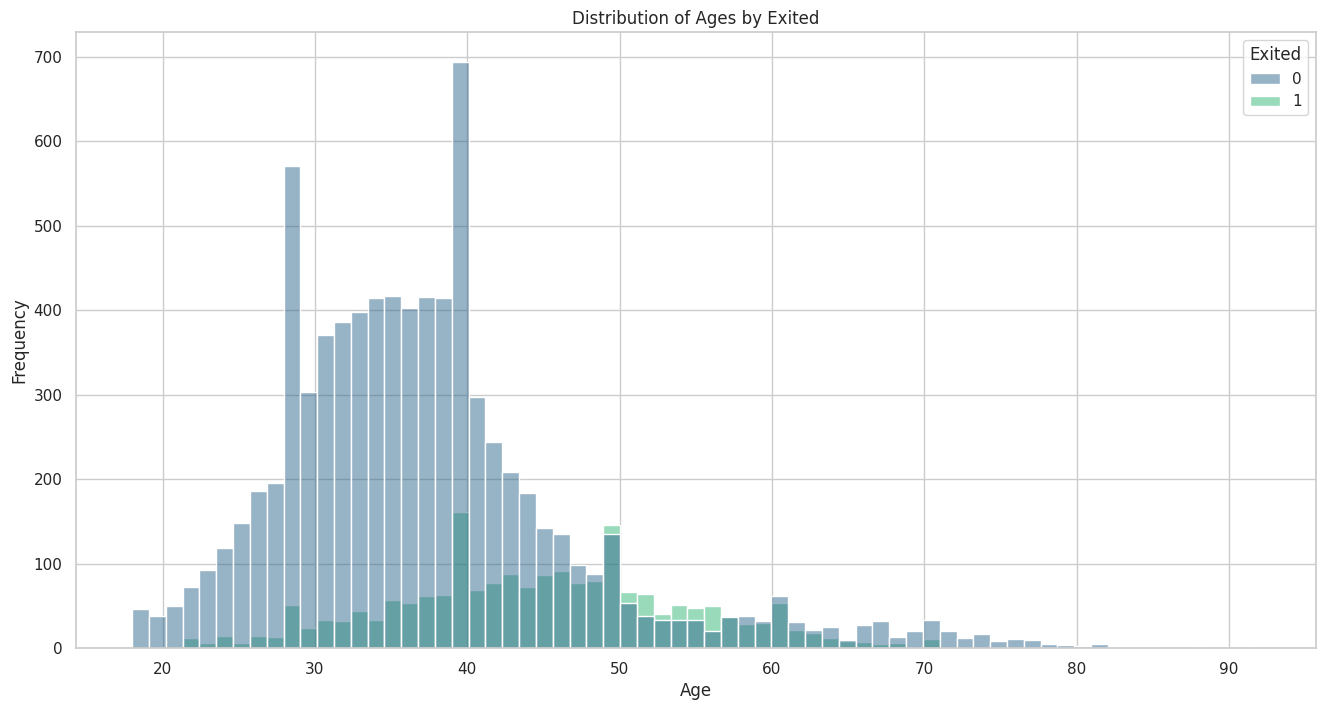

In [ ]:
# Plot the distribution of ages by churn status
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='Age', hue='Exited', kde=False, palette='viridis')

plt.title('Distribution of Ages by Exited')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Conclusion**

Majority of the customers are around the age of 40 while they are still the majority that exited and stayed

**5.Tenure Vs Exited**

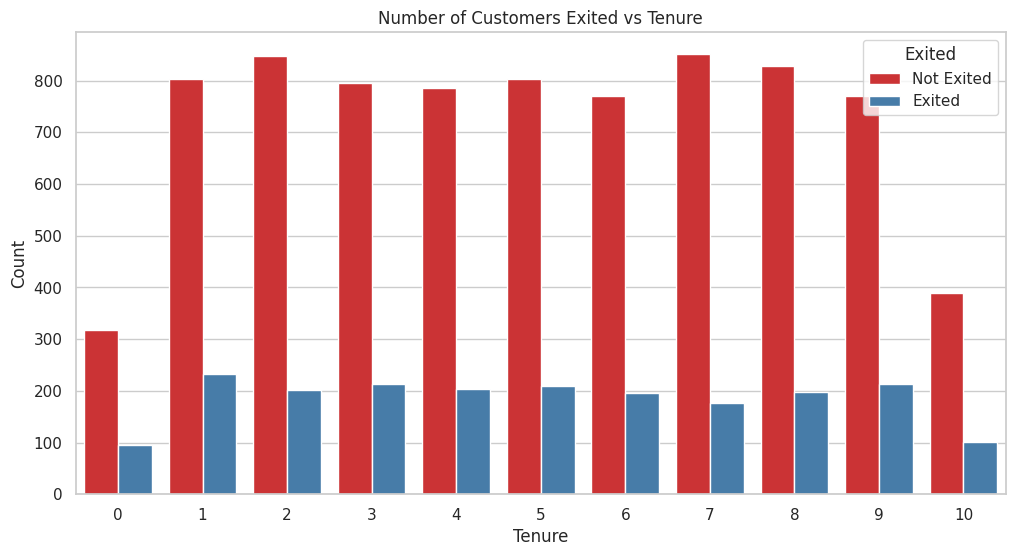

In [ ]:
# Plot the count of customers who exited vs. tenure
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=df1, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Tenure')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()

**Conclusion**

Majority of the customers have been there for 7 years

Considering the tenur and exiting the customers with the highest tenur(10) and the least tenur (0) exited the least

**6.Balance Vs Exited**

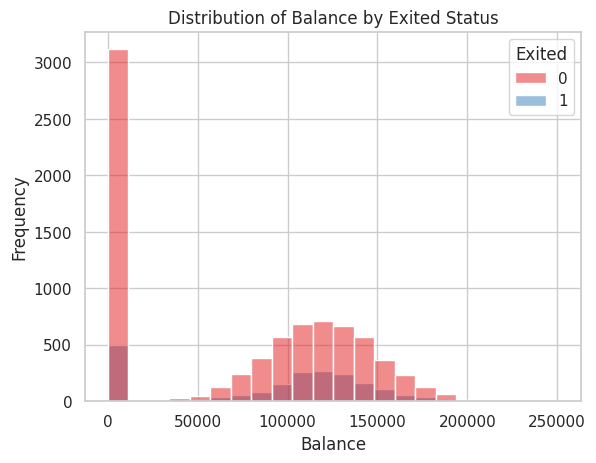

In [ ]:
sns.histplot(data=df1, x='Balance', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Balance by Exited Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Conclusion**

Majority balance is 0 and balance is not a strong indicator to predict whether a customer will exit or not.


**7.NumofProducts Vs Exited**

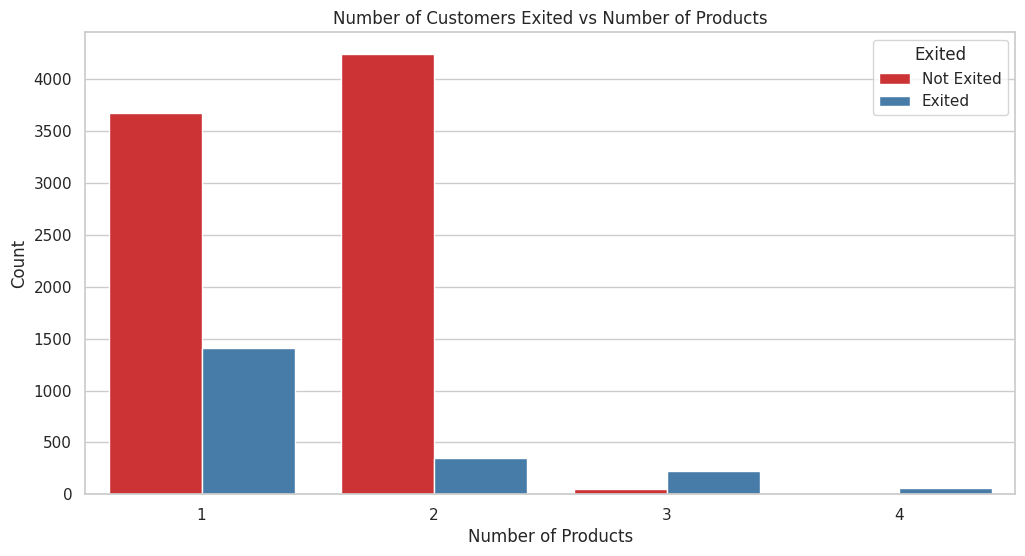

In [ ]:
# Plot the count of customers who exited vs. number of products
plt.figure(figsize=(12, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df1, palette='Set1')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Number of Products')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()

**Conclusion**

Most customers have 2 products and majority of the customers that exited had 1 product

least number of exits had 4 products

**8.HasCrCard Vs Exited**

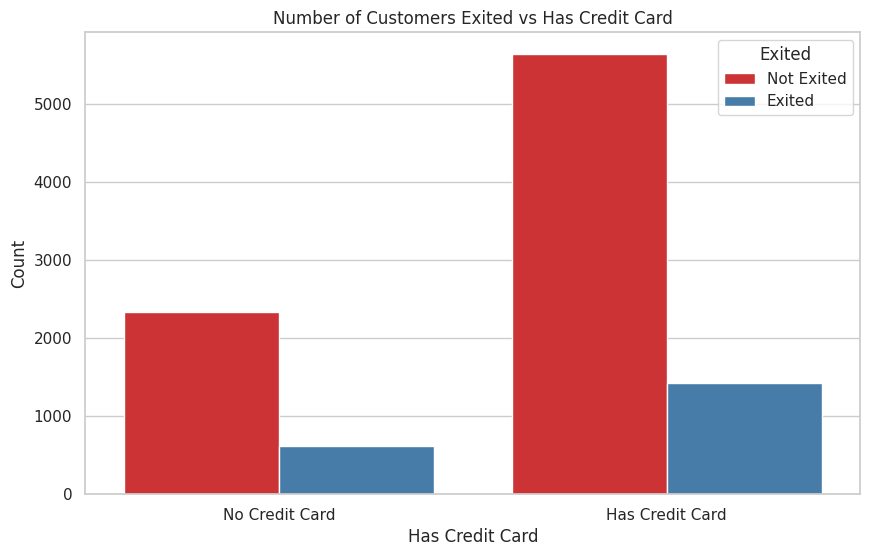

In [ ]:
# Plot the count of customers who exited vs. has credit card
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df1, palette='Set1')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Has Credit Card')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.show()

**Conclusion**

Most customers that exited had credit cards

**9.IsActiveMember Vs Exited**

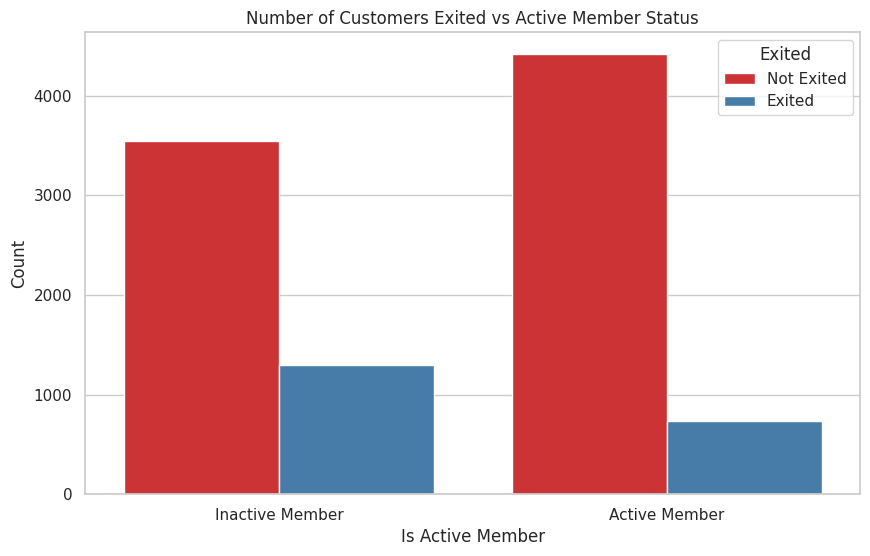

In [ ]:
# Plot the count of customers who exited vs. is active member
plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df1, palette='Set1')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Number of Customers Exited vs Active Member Status')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.xticks([0, 1], ['Inactive Member', 'Active Member'])
plt.show()

**Conclusion**

Most inactive customers exited the bank

**10.Estimated Salary Vs Exited**

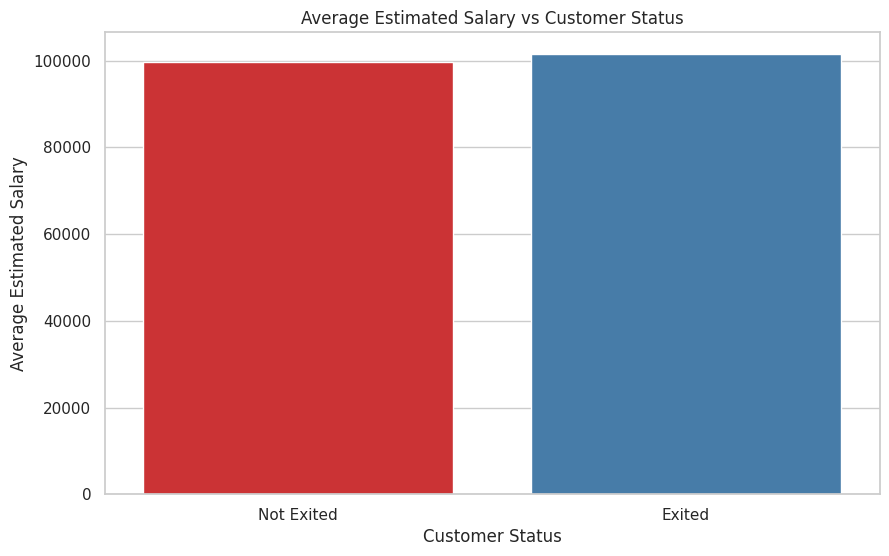

In [ ]:
# Calculate the average estimated salary for customers who exited and those who did not
avg_salary_exited = df1.groupby('Exited')['EstimatedSalary'].mean().reset_index()

# Convert 'Exited' to a categorical variable for better plot labeling
avg_salary_exited['Exited'] = avg_salary_exited['Exited'].map({0: 'Not Exited', 1: 'Exited'})

# Plot the average estimated salary vs. exited status
plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='EstimatedSalary', data=avg_salary_exited, palette='Set1')
plt.xlabel('Customer Status')
plt.ylabel('Average Estimated Salary')
plt.title('Average Estimated Salary vs Customer Status')
plt.show()

**Conclusion**


The estimated salary has not much effect on customer exit status.

# **Multivariate Analysis**

**1. Correlation Matrix and Heatmap**

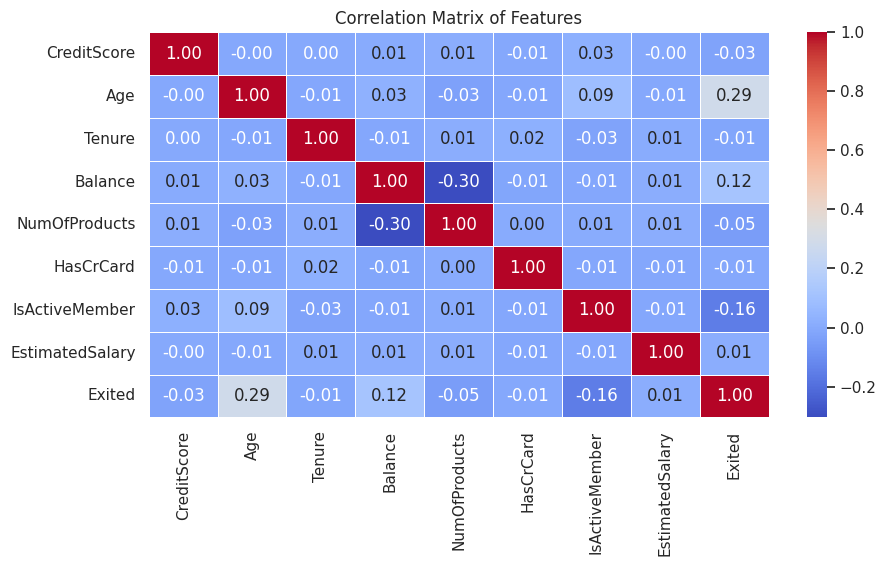

In [ ]:
# Exclude 'CustomerId' and non-numeric columns
numeric_df = df1.drop(columns=['CustomerId']).select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

**Conclusion**

The correlation matrix shows how features relate to each other. Positive values mean features move together (up or down), negative means they move opposite.

This matrix highlights weak positive correlations between credit score, age, tenure, and balance. There's a weak negative correlation between credit score and estimated salary.

# **DATA PRE-PROCESSING**

# **1.Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encoding 'Geography' using one-hot encoding without dropping any category
one_hot_encoder = OneHotEncoder(drop=None, sparse=False)
geography_encoded = one_hot_encoder.fit_transform(df1[['Geography']])
geography_encoded_df = pd.DataFrame(geography_encoded, columns=one_hot_encoder.get_feature_names_out(['Geography']))

# Encoding 'Gender' using label encoding
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])

# Combining the one-hot encoded 'Geography' with the original dataframe
df1 = df1.drop('Geography', axis=1)
df1 = pd.concat([df1, geography_encoded_df], axis=1)

# Display the updated DataFrame
df1.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


**Note**

One-Hot Encoding for Geography:

Uses OneHotEncoder to convert the Geography column into binary columns.
The drop='first' parameter is used to avoid multicollinearity by dropping the first category.
Label Encoding for Gender:

LabelEncoder to convert the Gender column into binary values Female = 0, Male = 1
Combining Encoded Features:

Drops the original Geography column and concatenates the new one-hot encoded columns with the original dataframe.

# **2.Feature Scaling**

Standardize or normalize numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical features
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

# Display the updated DataFrame
df1.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,1.0,0.0,0.0
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,0.0,0.0,1.0
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,1.0,0.0,0.0
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,1.0,0.0,0.0
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,0.0,0.0,1.0


Fit and Transform:

fit_transform is applied to the numerical features, which standardizes them so that they have a mean of 0 and a standard deviation of 1.

# **3.Multicollinearity**

Check for multicollinearity using the correlation matrix and VIF.

Handle multicollinearity by removing or combining correlated features, if necessary.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting features for VIF calculation
features = df1.drop(columns=['CustomerId', 'Exited'])  # Excluding 'CustomerId' and 'Exited' as they are not features for modeling

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# Display the VIF data
vif_data


,Feature,VIF
0,CreditScore,1.001046
1,Gender,1.003207
2,Age,1.012064
3,Tenure,1.001935
4,Balance,1.336461
5,NumOfProducts,1.122391
6,HasCrCard,1.001580
7,IsActiveMember,1.010516
8,EstimatedSalary,1.000936
9,Geography_France,1.652006


Since the VIF values are all low, it is not strictly necessary to remove any features based on multicollinearity.Features are not excessively correlated and should not negatively impact the performance of most models.

# **4.Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = df1.drop(columns=['CustomerId', 'Exited'])
y = df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verify the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000,)
y_test shape: (2000,)


# **5.Imbalance**

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


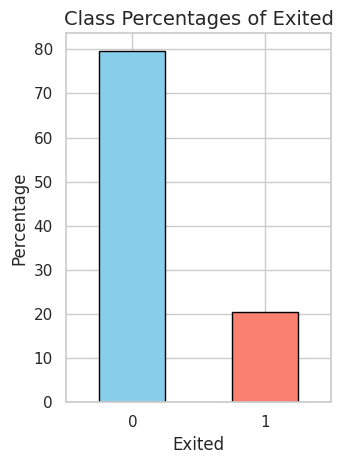

In [ ]:
# Checking for class imbalance
class_counts = df1['Exited'].value_counts()
print(class_counts)

# Calculating the percentage of each class
class_percentages = df1['Exited'].value_counts(normalize=True) * 100
print(class_percentages)


# Plotting the class percentages
plt.subplot(1, 2, 2)
class_percentages.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Class Percentages of Exited', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



**Conclusion**

The output indicates that your dataset is imbalanced, with about 79.63% of the samples belonging to the class 0 (not exited) and 20.37% belonging to the class 1 (exited).

**Handling Class Imbalance using SMOTE**



Resampled class distribution:
 Exited
0    6356
1    6356
Name: count, dtype: int64


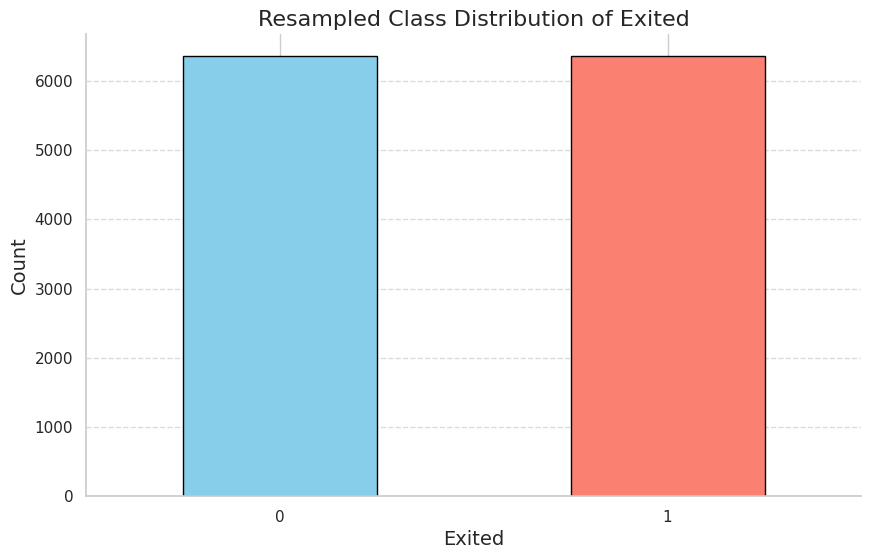

In [ ]:
from imblearn.over_sampling import SMOTE


# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the resampled class distribution
resampled_class_counts = pd.Series(y_resampled).value_counts()
print("Resampled class distribution:\n", resampled_class_counts)

# Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
resampled_class_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Resampled Class Distribution of Exited', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



**K-Fold Cross-Validation**

This is useful for getting a sense of how well the features are likely to perform with an actual model.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with best parameters
log_reg = LogisticRegression(C=1, solver='liblinear', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



Cross-validation scores: [0.6948486  0.72158867 0.7281668  0.72541306 0.73721479]
Mean cross-validation score: 0.7214463857373088


**Conclusion**

 mean accuracy is approximately 72.14%. This suggests that the preprocessing steps and feature selection are effective.

# **MODELLING**

# **1.Logistic Regression Model**

This is my baseline model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print('-' * 15)



Logistic Regression Accuracy: 72.15%
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.38      0.69      0.49       393

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.75      2000

Confusion Matrix:
 [[1171  436]
 [ 121  272]]
ROC AUC Score: 0.7778184184650171
---------------


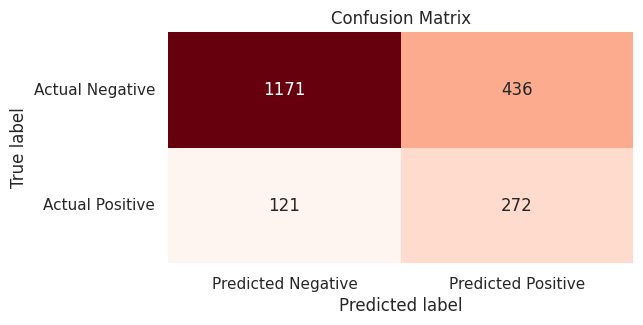

In [ ]:
# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.title('Confusion Matrix')
plt.show()

**Hyperparameter tuning using GridSearchCV for Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Accuracy Score: 0.7214463857373088


# **2.Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_resampled, y_resampled)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))
print('-' * 15)


Decision Tree Accuracy: 76.10%
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1607
           1       0.41      0.51      0.45       393

    accuracy                           0.76      2000
   macro avg       0.64      0.66      0.65      2000
weighted avg       0.78      0.76      0.77      2000

Confusion Matrix:
 [[1323  284]
 [ 194  199]]
ROC AUC Score: 0.6648172514967121
---------------


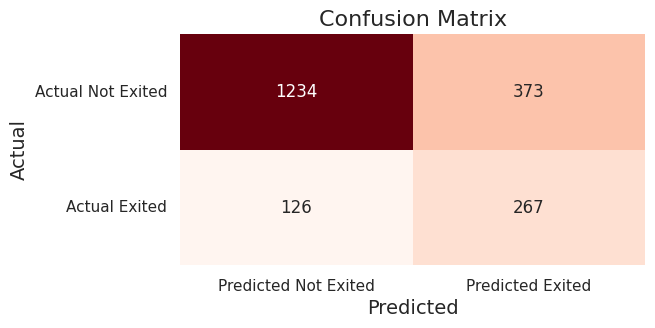

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

**Hyperparameter Tuning for Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.832527760907358


# **3.K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_resampled, y_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
print('-' * 15)


K-Nearest Neighbors Accuracy: 75.05%
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1607
           1       0.42      0.68      0.52       393

    accuracy                           0.75      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.75      0.77      2000

Confusion Matrix:
 [[1234  373]
 [ 126  267]]
ROC AUC Score: 0.7755644437266349
---------------


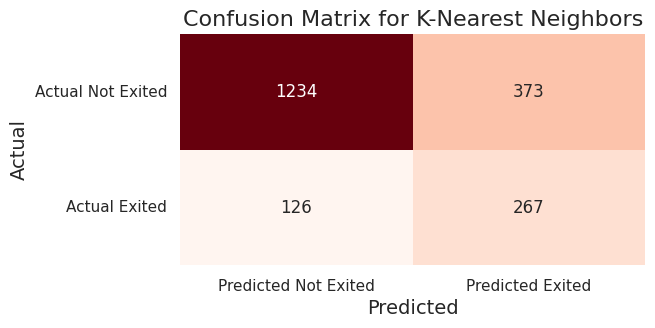

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for K-Nearest Neighbors', fontsize=16)
plt.show()

**Hyperparameter Tuning for K-Nearest Neighbors**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy Score: 0.885779386062479


# **4.XGBoost**




In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


XGBoost Accuracy: 85.20%
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.64      0.55      0.59       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000

Confusion Matrix:
 [[1488  119]
 [ 177  216]]
ROC AUC Score: 0.8448359673248875


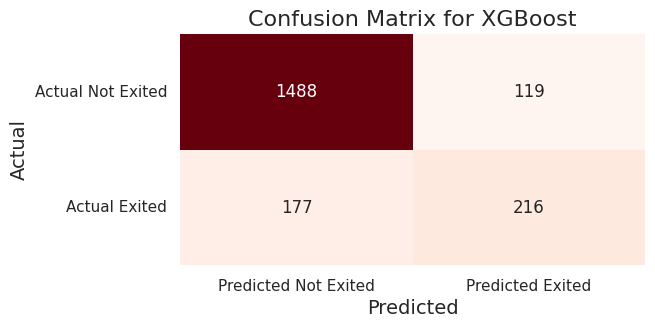

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for XGBoost', fontsize=16)
plt.show()

**Hyperparameter Tuning for XGBoost**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.7}
Best Accuracy Score: 0.8924748611838611


# **MODEL EVALUATION**

# **1.Logistic Regression Model**

**Accuracy:**

The logistic regression model achieved an accuracy of 72.15%, indicating its ability to correctly classify instances but lower than other models

**Precision:**

Class 0: With a precision of 91%, the model shows a low rate of false positives for non-churn customers.Class 1: With a precision of 38%, the model has a considerable rate of false positives, suggesting that it incorrectly predicts churn for a significant number of non-churn customers.

**Recall:**

Class 0: At 73%, the model exhibits a good ability to capture the actual non-churn customers.
Class 1: At 69%, the model shows a relatively strong ability to capture actual positive cases of churn.

**F1-Score:**

Class 0: The F1-score is 0.81, indicating a good balance between precision and recall for non-churn customers.
Class 1: The F1-score stands at 0.49, highlighting the need for improvement to strike a better balance between precision and recall for churn customers.

**Confusion Matrix**

True Negatives (1171): The model correctly predicted 1171 instances as non-churn customers.

False Positives (436): The model incorrectly predicted 436 instances as churn customers when they are actually non-churn.

True Positives (272): The model correctly predicted 272 instances as churn customers.

False Negatives (121): The model incorrectly predicted 121 instances as non-churn customers when they are actually churn.


# **2.Decision Tree Model**

**Accuracy:**

The decision tree model achieved an accuracy of 83.25%, indicating its ability to correctly classify instances.

**Precision:**

Class 0: With a precision of 87%, the model shows a low rate of false positives for non-churn customers.

Class 1: With a precision of 41%, the model has a considerable rate of false positives, suggesting that it incorrectly predicts churn for a significant number of non-churn customers.

**Recall:**

Class 0: At 82%, the model exhibits a good ability to capture the actual non-churn customers.
Class 1: At 51%, the model shows a moderate ability to capture actual positive cases of churn.

**F1-Score:**

Class 0: The F1-score is 0.85, indicating a good balance between precision and recall for non-churn customers.
Class 1: The F1-score stands at 0.45, highlighting the need for improvement to strike a better balance between precision and recall for churn customers.

**ROC AUC Score:**

The ROC AUC Score is 0.665, indicating a moderate ability of the model to distinguish between the classes.

**Confusion Matrix**

True Negatives (1323): The model correctly predicted 1323 instances as non-churn customers.

False Positives (284):The model incorrectly predicted 284 instances as churn customers when they are actually non-churn.

True Positives (199): The model correctly predicted 199 instances as churn customers.
False Negatives (194): The model incorrectly predicted 194 instances as non-churn customers when they are actually churn.


# **3.K-Nearest Neighbors**

**Accuracy:**

The model achieved an accuracy of 88.57%, indicating its ability to correctly classify instances.

**Precision:**

Class 0: With a precision of 91%, the model shows a low rate of false positives for non-churn customers.
Class 1: With a precision of 42%, the model has a considerable rate of false positives, suggesting that it incorrectly predicts churn for a significant number of non-churn customers.

**Recall:**

Class 0: At 77%, the model exhibits a good ability to capture the actual non-churn customers.
Class 1: At 68%, the model shows a moderate ability to capture actual positive cases of churn.

**F1-Score:**

Class 0: The F1-score is 0.83, indicating a good balance between precision and recall for non-churn customers.
Class 1: The F1-score stands at 0.52, highlighting the need for improvement to strike a better balance between precision and recall for churn customers.

**ROC AUC Score:**

The ROC AUC Score is 0.7756, indicating a good ability of the model to distinguish between the classes.

**confusion matrix**

True Negatives (1234): The model correctly predicted 1234 instances as non-churn customers.

False Positives (373): The model incorrectly predicted 373 instances as churn customers when they are actually non-churn.

True Positives (267): The model correctly predicted 267 instances as churn customers.

False Negatives (126): The model incorrectly predicted 126 instances as non-churn customers when they are actually churn.



# **4.XGBoost**

**Accuracy:**

The model achieved an accuracy of 89.25%, indicating its ability to correctly classify instances.

**Precision:**

Class 0: With a precision of 89%, the model shows a low rate of false positives for non-churn customers.
Class 1: With a precision of 64%, the model has a moderate rate of false positives, suggesting that it incorrectly predicts churn for some non-churn customers.

**Recall:**

Class 0: At 93%, the model exhibits a very good ability to capture the actual non-churn customers.
Class 1: At 55%, the model shows a moderate ability to capture actual positive cases of churn.

**F1-Score:**

Class 0: The F1-score is 0.91, indicating a good balance between precision and recall for non-churn customers.
Class 1: The F1-score stands at 0.59, highlighting the need for improvement to strike a better balance between precision and recall for churn customers.

**ROC AUC Score:**

The ROC AUC Score is 0.8448, indicating a good ability of the model to distinguish between the classes.

**Confusion Matrix:**

True Negatives (1488): The model correctly predicted 1488 instances as non-churn customers.

False Positives (119): The model incorrectly predicted 119 instances as churn customers when they are actually non-churn.

True Positives (216): The model correctly predicted 216 instances as churn customers.

False Negatives (177): The model incorrectly predicted 177 instances as non-churn customers when they are actually churn.

**Plot for the ROC AUC values of Logistic Regression, Decision Tree,KK-Nearest Neighbors  and XGBoost K-Nearest Neighbors**


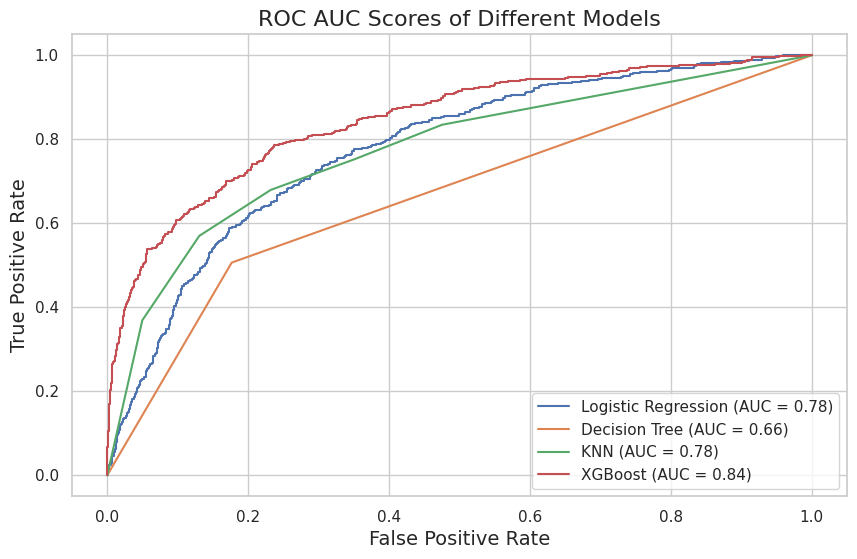

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(random_state=42)

# Train models
log_reg.fit(X_resampled, y_resampled)
decision_tree.fit(X_resampled, y_resampled)
knn.fit(X_resampled, y_resampled)
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_decision_tree = decision_tree.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores and curves
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)

auc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_pred_decision_tree)

auc_knn = roc_auc_score(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

auc_xgb = roc_auc_score(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

# Plot ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC AUC Scores of Different Models', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

The ROC AUC scores comparison in the graph demonstrates that the XGBoost model (AUC = 0.84) significantly outperforms the other models, including Logistic Regression (AUC = 0.78), KNN (AUC = 0.78), and Decision Tree (AUC = 0.66). This indicates that XGBoost has the best ability to distinguish between churn and non-churn customers, making it the most effective model for predicting customer churn in this dataset.

# **CONCLUSION**

The Best perofroming Model was XGBoost. Below is a rank of the features of importance:

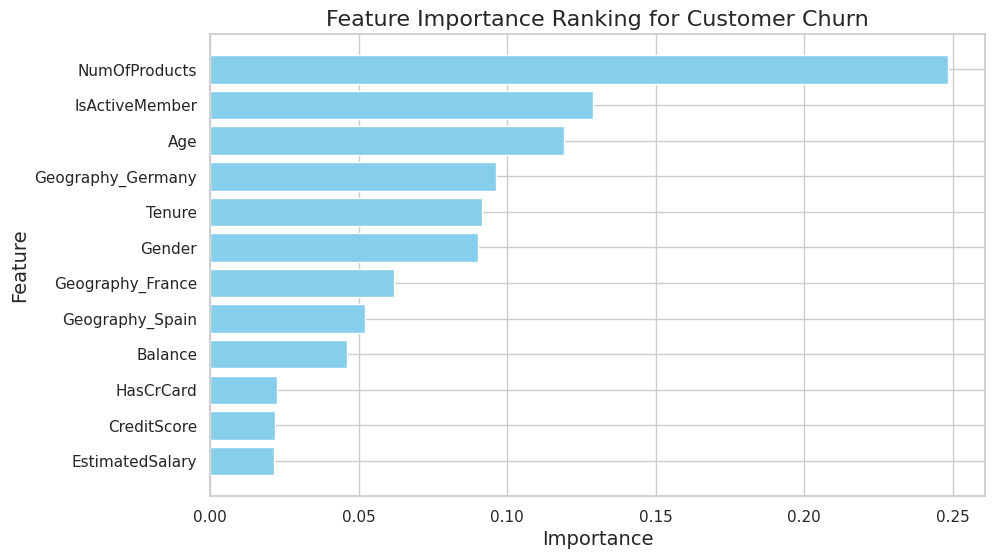

In [ ]:
# Rank predictors by importance
feature_importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance Ranking for Customer Churn', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


The feature importance ranking for customer churn indicates that the number of products a customer has is the most significant predictor of churn, followed by whether the customer is an active member and their age. Geographic location, tenure, and gender also play notable roles. Other factors like balance, having a credit card, credit score, and estimated salary have less influence on predicting customer churn. This insight can guide targeted strategies to enhance customer retention.

# **RECOMENDATIONS**


- **Enhance Product Offerings**: Focus on increasing the number of products per customer to improve retention.
- **Engage Active Members**: Develop strategies to keep members active and engaged.
- **Target Specific Demographics**: Tailor retention strategies based on age and geographic location.
- **Improve Customer Experience**: Focus on high-tenure and gender-specific needs to enhance satisfaction.


# **NEXT STEPS**

- **Customer Engagement Programs**: Develop and launch targeted retention campaigns based on model insights.
- **Training and Support**: Provide training sessions for staff on using the new predictive model and interpreting its outputs.
- **Communication Strategy**: Communicate the benefits of the predictive model to stakeholders and customers to ensure buy-in.
- **Monitor Impact**: Regularly review the impact of retention strategies on customer churn rates and adjust accordingly.
